In [1]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 208.8 MB 2.9 MB/s eta 0:00:01    |█████████▉                      | 64.4 MB 4.6 MB/s eta 0:00:32     |████████████████▉               | 109.9 MB 6.1 MB/s eta 0:00:17
     |████████████████████████████████| 2.7 MB 6.5 MB/s eta 0:00:01
  Using cached libclang-16.0.6-py2.py3-none-macosx_11_0_arm64.whl (20.6 MB)
     |████████████████████████████████| 133 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 441 kB 6.5 MB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 3.4 MB 7.6 MB/s eta 0:00:01
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
     |████████████████████████████████| 10.1 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 394 kB 4.2 MB/s eta

In [2]:
import tensorflow as tf

/Users/anhappy170/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
print(tf.__version__)

2.15.0


In [5]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.5 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 242 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 7.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [9]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [12]:
# Part 2 - Now let's make the ANN!

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [14]:
# Initialising the ANN
classifier = Sequential()

In [15]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [17]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [18]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 1s 624us/step - loss: 1.6635 - accuracy: 0.7847 - val_loss: 0.8905 - val_accuracy: 0.7546
Epoch 2/50
536/536 [==============================] - 0s 487us/step - loss: 0.7181 - accuracy: 0.7643 - val_loss: 0.6539 - val_accuracy: 0.7599
Epoch 3/50
536/536 [==============================] - 0s 542us/step - loss: 0.6017 - accuracy: 0.7742 - val_loss: 0.5822 - val_accuracy: 0.7721
Epoch 4/50
536/536 [==============================] - 0s 505us/step - loss: 0.5758 - accuracy: 0.7886 - val_loss: 0.5796 - val_accuracy: 0.7864
Epoch 5/50
536/536 [==============================] - 0s 496us/step - loss: 0.5367 - accuracy: 0.7796 - val_loss: 0.5200 - val_accuracy: 0.7777
Epoch 6/50
536/536 [==============================] - 0s 483us/step - loss: 0.5117 - accuracy: 0.7951 - val_loss: 0.5245 - val_accuracy: 0.7899
Epoch 7/50
536/536 [==============================] - 0s 509us/step - loss: 0.4969 - accuracy: 0.8001 - val_loss: 0.5004 - val_accuracy:

In [20]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


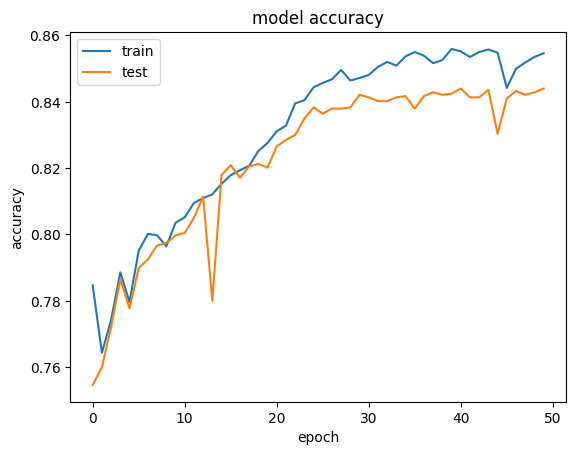

In [21]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

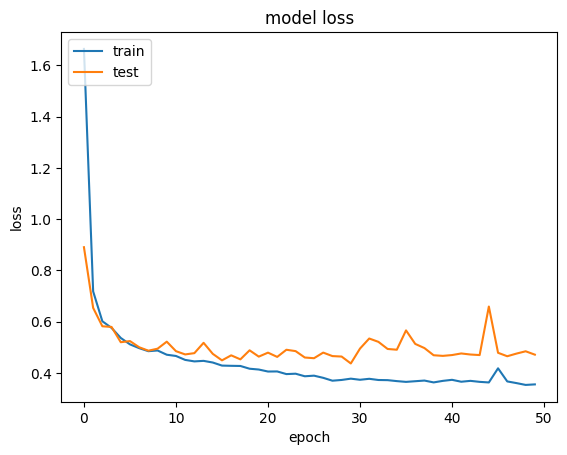

In [22]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 312us/step


In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1507,   88],
       [ 216,  189]])

In [25]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [26]:
score

0.848